# Prediction of diabetic patients readmitted on hospital due to different features!

# Importing Data Set

### printing it first five rows

In [85]:
import pandas as pd
df = pd.read_csv("INPUT/diabetic_data_raw.csv")
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


### Getting Dataframe information

df.info(verbose=True)

### Describing Dataframe for better undestanding of its features

In [87]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


### Looking for  NaN or null values in the whole Dataframe 

In [88]:
df.isna().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

### Droping unnecessary columns

In [89]:
df.drop(["encounter_id", "patient_nbr", "weight", "payer_code", "medical_specialty", 
         "admission_type_id", "acetohexamide"], axis=1, inplace=True) 
df.drop(["discharge_disposition_id", "admission_source_id", "diag_1", "diag_2", "diag_3", 
         "examide", "citoglipton"], axis=1, inplace=True)

### Getting "Dummies", droping old columns and replacing data to easily work with it

In [91]:
dfd = pd.get_dummies(df, columns=["race", "gender", "age", "max_glu_serum", "A1Cresult", "metformin", 
                                  "repaglinide", "nateglinide"], drop_first=True)
dfd2 = pd.get_dummies(dfd, columns=["chlorpropamide", "glimepiride", "glipizide", "glyburide", "pioglitazone", 
                                   "rosiglitazone", "acarbose", "miglitol"], drop_first=True)
dfd3 = pd.get_dummies(dfd2, columns=["tolazamide", "insulin", "glyburide-metformin"], drop_first=True)
df = dfd3

df.replace({
    "acetohexamide":{"No": 0, "Steady":1},
    "tolbutamide":{"No": 0, "Steady":1},
    "troglitazone":{"No": 0, "Steady":1},
    "glipizide-metformin":{"No": 0, "Steady":1},
    "glimepiride-pioglitazone":{"No": 0, "Steady":1},
    "metformin-rosiglitazone":{"No": 0, "Steady":1},
    "metformin-pioglitazone":{"No": 0, "Steady":1},
    "change":{"No": 0, "Ch":1},
    "diabetesMed":{"No": 0, "Yes":1}}, inplace = True)

### Checking if changes worked, and the Dataframe is ready to worked on

In [92]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 80 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   time_in_hospital            101766 non-null  int64 
 1   num_lab_procedures          101766 non-null  int64 
 2   num_procedures              101766 non-null  int64 
 3   num_medications             101766 non-null  int64 
 4   number_outpatient           101766 non-null  int64 
 5   number_emergency            101766 non-null  int64 
 6   number_inpatient            101766 non-null  int64 
 7   number_diagnoses            101766 non-null  int64 
 8   tolbutamide                 101766 non-null  int64 
 9   troglitazone                101766 non-null  int64 
 10  glipizide-metformin         101766 non-null  int64 
 11  glimepiride-pioglitazone    101766 non-null  int64 
 12  metformin-rosiglitazone     101766 non-null  int64 
 13  metformin-pioglitazone      1

### Saving Cleaned Dataframe

In [7]:
df.to_csv("INPUT/diabetic_data_cleaned.csv", index=False)

####   

## Visualization of Data

### Scatter matrix of cleaned data


In [95]:
df = pd.read_csv("INPUT/diabetic_data_cleaned.csv").drop(["Unnamed: 0"],axis=1)

KeyError: "['Unnamed: 0'] not found in axis"

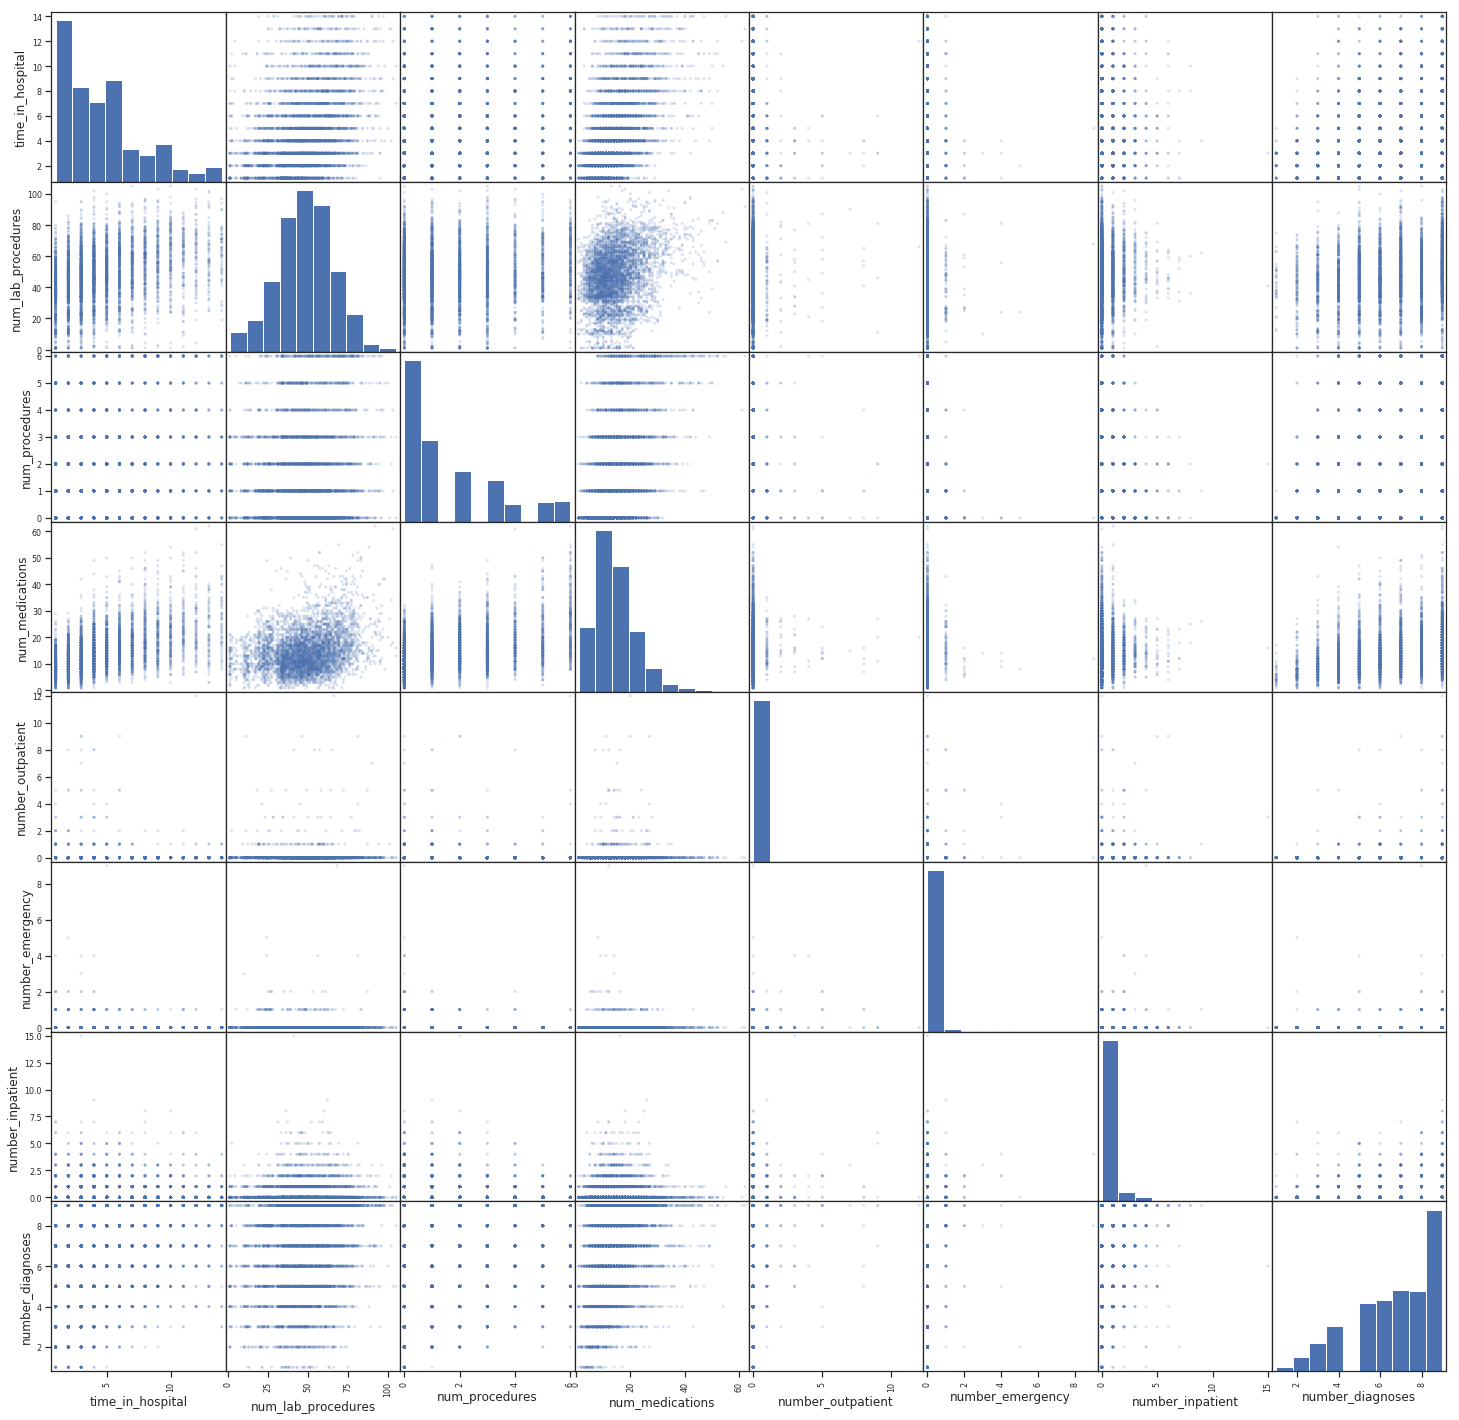

In [96]:
dfascatter = df.iloc[:5000,[0,1,2,3,4,5,6,7]]
%matplotlib inline
pd.plotting.scatter_matrix(dfascatter, alpha=0.2, figsize=(25, 25));

#### The pairs plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.

### Heatmap for clean data

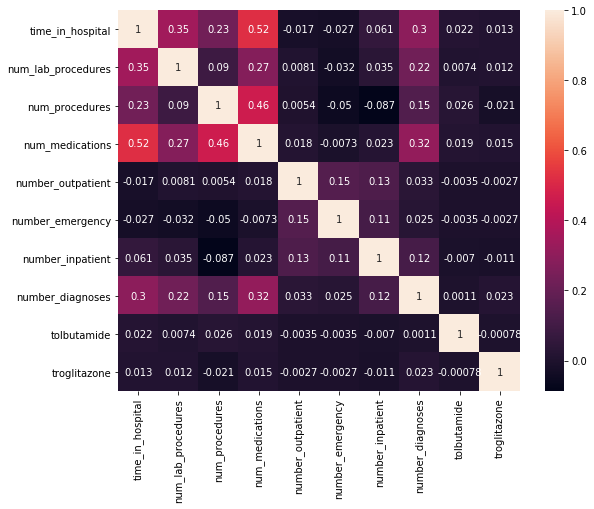

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
dfasns = df.iloc[:5000,[0,1,2,3,4,5,6,7,8,9]]
corre = dfasns.corr()


fig, ax_newCorr = plt.subplots(figsize=(9,7))  
ax_corr = sns.heatmap(corre, annot = True)


#### Pearson's Correlation Coefficient: 
##### Helps you find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.
##### A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.

### Bar Plot

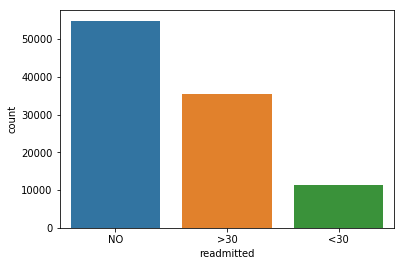

In [14]:
sns.countplot(df["readmitted"])

#### The above graph shows that the data is based towards datapoints having outcomes values as (NO) where it means that diabetic patients were not readmitted in the hostpital, (>30) The number of diabetics that got readmitted after 30 days of their realease date, and (<30) number of diabetics that were readmitted before 30 days after realease.

### Pair plot for clean data

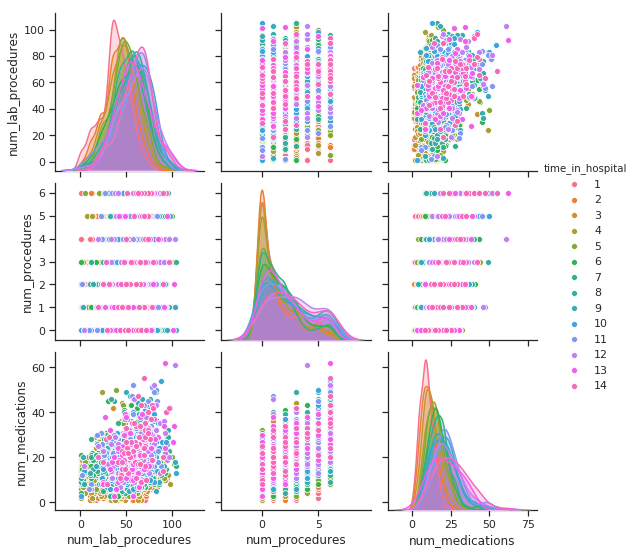

In [15]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
dfpp = df.iloc[:5000,[0,1,2,3]]
sns.pairplot(dfpp, hue="time_in_hospital")

#### In the pair plot graphic above we countinue evaluating our data by graphics so we find out in a more visuable way the distribution betweet the same variable, and the distribution between different ones.

#### As we show in the difference between "num_medications" and the "num_lab_procedures"...

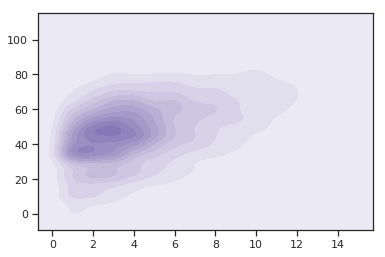

In [93]:
dfkde = df.iloc[:5000,[0,1,2,3]]
ax = sns.kdeplot(dfkde, shade=True, bw="scott", color="m")
ax

#### In the graphic above we can see a bivariate kernel density estimate for the four first columns of the dataframe.

#  

## Testing different Classifier models to find the better one for our Data

### Importing all needed libraries

In [98]:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, mean_squared_error,classification_report
from sklearn.svm import SVC, LinearSVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [101]:
# Separate the data set as response variable and feature variable

X = df.drop(["readmitted"], axis=1)
y = df["readmitted"]

# Train and test splitting of data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Aplying standard scaler to get optimized results

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Random Forest Classifier:

In [102]:
rfc =  RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
print (classification_report(y_test, pred_rfc))
print (confusion_matrix(y_test, pred_rfc))

              precision    recall  f1-score   support

         <30       0.30      0.03      0.05      2285
         >30       0.45      0.35      0.40      7043
          NO       0.60      0.80      0.69     11026

    accuracy                           0.56     20354
   macro avg       0.45      0.39      0.38     20354
weighted avg       0.52      0.56      0.52     20354

[[  60  884 1341]
 [  76 2491 4476]
 [  64 2104 8858]]


              precision    recall  f1-score   support

         <30       0.26      0.02      0.04      2287
         >30       0.46      0.36      0.40      7156
          NO       0.60      0.80      0.68     10911

    accuracy                           0.56     20354
   macro avg       0.44      0.39      0.38     20354
weighted avg       0.51      0.56      0.51     20354

[[  54  872 1361]
 [  81 2546 4529]
 [  73 2096 8742]]


####               precision    recall  f1-score   support
#### 
####          <30       0.26      0.02      0.04      2287
####          >30       0.46      0.36      0.40      7156
####           NO       0.60      0.80      0.68     10911
#### 
####     accuracy                           0.56     20354
####    macro avg       0.44      0.39      0.38     20354
#### weighted avg       0.51      0.56      0.51     20354
#### 
#### [[  54  872 1361]
####  [  81 2546 4529]
####  [  73 2096 8742]]
#### 

### SVM Classifier:

In [38]:
###from sklearn.svm import SVC
###from sklearn import svm
###
###
###
###clf = svm.SVC()
###clf.fit(X_train, y_train)
###pred_clf = clf.predict(X_test)

In [34]:
###print (classification_report(y_test, pred_clf))
###print (confusion_matrix(y_test, pred_clf))

              precision    recall  f1-score   support

         <30       0.59      0.01      0.01      2287
         >30       0.50      0.23      0.32      7156
          NO       0.58      0.91      0.71     10911

    accuracy                           0.57     20354
   macro avg       0.56      0.38      0.35     20354
weighted avg       0.55      0.57      0.49     20354

[[  13  654 1620]
 [   8 1651 5497]
 [   1 1012 9898]]


## Neural Network

In [36]:
from sklearn.neural_network import MLPClassifier

X = df.drop(["readmitted"], axis=1)
y = df["readmitted"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

mlpc = MLPClassifier(hidden_layer_sizes=(80,80,80), max_iter=1000, verbose=True)
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)

Iteration 1, loss = 0.91721675
Iteration 2, loss = 0.89925643
Iteration 3, loss = 0.89408528
Iteration 4, loss = 0.89091757
Iteration 5, loss = 0.88829757
Iteration 6, loss = 0.88588953
Iteration 7, loss = 0.88365144
Iteration 8, loss = 0.88123265
Iteration 9, loss = 0.87910188
Iteration 10, loss = 0.87628755
Iteration 11, loss = 0.87320107
Iteration 12, loss = 0.87043011
Iteration 13, loss = 0.86734195
Iteration 14, loss = 0.86438198
Iteration 15, loss = 0.86170336
Iteration 16, loss = 0.85818147
Iteration 17, loss = 0.85518156
Iteration 18, loss = 0.85151867
Iteration 19, loss = 0.84830662
Iteration 20, loss = 0.84535913
Iteration 21, loss = 0.84258588
Iteration 22, loss = 0.83888389
Iteration 23, loss = 0.83574461
Iteration 24, loss = 0.83261565
Iteration 25, loss = 0.83001880
Iteration 26, loss = 0.82582682
Iteration 27, loss = 0.82382227
Iteration 28, loss = 0.82015130
Iteration 29, loss = 0.81777672
Iteration 30, loss = 0.81514049
Iteration 31, loss = 0.81321011
Iteration 32, los

Iteration 253, loss = 0.65824881
Iteration 254, loss = 0.66008700
Iteration 255, loss = 0.66013166
Iteration 256, loss = 0.65924543
Iteration 257, loss = 0.65883391
Iteration 258, loss = 0.66139079
Iteration 259, loss = 0.65784506
Iteration 260, loss = 0.65761372
Iteration 261, loss = 0.65654917
Iteration 262, loss = 0.65674827
Iteration 263, loss = 0.65613728
Iteration 264, loss = 0.65663727
Iteration 265, loss = 0.65697766
Iteration 266, loss = 0.65738118
Iteration 267, loss = 0.65768608
Iteration 268, loss = 0.65747586
Iteration 269, loss = 0.65512040
Iteration 270, loss = 0.65410947
Iteration 271, loss = 0.65682255
Iteration 272, loss = 0.65375518
Iteration 273, loss = 0.65596065
Iteration 274, loss = 0.65391261
Iteration 275, loss = 0.65570485
Iteration 276, loss = 0.65467863
Iteration 277, loss = 0.65668825
Iteration 278, loss = 0.65340104
Iteration 279, loss = 0.65329833
Iteration 280, loss = 0.65372943
Iteration 281, loss = 0.65298605
Iteration 282, loss = 0.65466119
Iteration 

In [37]:
print (classification_report(y_test, pred_mlpc))
print (confusion_matrix(y_test, pred_mlpc))

              precision    recall  f1-score   support

         <30       0.17      0.09      0.11      2283
         >30       0.41      0.36      0.38      7158
          NO       0.58      0.69      0.63     10913

    accuracy                           0.51     20354
   macro avg       0.39      0.38      0.38     20354
weighted avg       0.48      0.51      0.49     20354

[[ 198  831 1254]
 [ 492 2585 4081]
 [ 484 2929 7500]]


In [50]:
from sklearn.neural_network import MLPClassifier

X = df.drop(["readmitted"], axis=1)
y = df["readmitted"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

mlpc = MLPClassifier(hidden_layer_sizes=(80,80,80), max_iter=100, verbose=True)
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)

Iteration 1, loss = 0.91800207
Iteration 2, loss = 0.90166654
Iteration 3, loss = 0.89649489
Iteration 4, loss = 0.89347012
Iteration 5, loss = 0.89070535
Iteration 6, loss = 0.88757726
Iteration 7, loss = 0.88584910
Iteration 8, loss = 0.88306390
Iteration 9, loss = 0.88027693
Iteration 10, loss = 0.87767121
Iteration 11, loss = 0.87464088
Iteration 12, loss = 0.87089755
Iteration 13, loss = 0.86814149
Iteration 14, loss = 0.86528628
Iteration 15, loss = 0.86091265
Iteration 16, loss = 0.85820031
Iteration 17, loss = 0.85468321
Iteration 18, loss = 0.85134696
Iteration 19, loss = 0.84737847
Iteration 20, loss = 0.84448762
Iteration 21, loss = 0.84078411
Iteration 22, loss = 0.83767050
Iteration 23, loss = 0.83315365
Iteration 24, loss = 0.83033308
Iteration 25, loss = 0.82702601
Iteration 26, loss = 0.82429324
Iteration 27, loss = 0.82106210
Iteration 28, loss = 0.81806031
Iteration 29, loss = 0.81524734
Iteration 30, loss = 0.81219234
Iteration 31, loss = 0.81027240
Iteration 32, los

/home/fabian/.local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [54]:
print (classification_report(y_test, pred_mlpc))
print (confusion_matrix(y_test, pred_mlpc))

              precision    recall  f1-score   support

         <30       0.16      0.10      0.12      2176
         >30       0.42      0.36      0.39      7158
          NO       0.60      0.69      0.64     11020

    accuracy                           0.51     20354
   macro avg       0.39      0.38      0.38     20354
weighted avg       0.49      0.51      0.50     20354

[[ 222  799 1155]
 [ 578 2591 3989]
 [ 604 2816 7600]]


In [48]:
from sklearn.neural_network import MLPClassifier

X = df.drop(["readmitted"], axis=1)
y = df["readmitted"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

mlpc = MLPClassifier(hidden_layer_sizes=(80,80,80), max_iter=500, verbose=True)
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)

Iteration 1, loss = 0.92005832
Iteration 2, loss = 0.89710133
Iteration 3, loss = 0.89270456
Iteration 4, loss = 0.88965726


/home/fabian/.local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [49]:
print (classification_report(y_test, pred_mlpc))
print (confusion_matrix(y_test, pred_mlpc))

              precision    recall  f1-score   support

         <30       0.36      0.02      0.04      2286
         >30       0.48      0.31      0.38      7236
          NO       0.59      0.85      0.70     10832

    accuracy                           0.56     20354
   macro avg       0.48      0.39      0.37     20354
weighted avg       0.53      0.56      0.51     20354

[[  51  786 1449]
 [  69 2232 4935]
 [  21 1615 9196]]


In [50]:
df["age_[80-90)"].value_counts(dropna=True)

0    84569
1    17197
Name: age_[80-90), dtype: int64

In [51]:
y_test.value_counts()

NO     10832
>30     7236
<30     2286
Name: readmitted, dtype: int64

In [52]:
df["readmitted"].value_counts(normalize=True)

NO     0.539119
>30    0.349282
<30    0.111599
Name: readmitted, dtype: float64

In [53]:
y_test.value_counts().head(1) / len(y_test)

NO    0.53218
Name: readmitted, dtype: float64

In [54]:
print ("True:", y_test.values[0:13])
print ("Pred:", pred_mlpc[0:13])

True: ['>30' '<30' '>30' '>30' '>30' '>30' '>30' '>30' 'NO' '>30' 'NO' 'NO'
 '>30']
Pred: ['NO' 'NO' 'NO' '>30' 'NO' '>30' '>30' '>30' 'NO' 'NO' 'NO' 'NO' 'NO']


In [76]:
models = {
#    "Linear": LinearSVC(max_iter=300),
#    "neighbors": KNeighborsClassifier(),
#    "histboosting": HistGradientBoostingClassifier(verbose=True),
#    "histboosting": HistGradientBoostingClassifier(),
#    "forest300,50": RandomForestClassifier(n_estimators=300, max_depth=50, verbose=True),
#    "Gradientboosting" : GradientBoostingClassifier(verbose=True)
}
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5)
    print(f"{name} accuracy => {np.mean(scores)}")
#print ("La predicción de que el paciente ingresado no vuelva al hospital es de:", round(clf.score(X_train, y_train)*100, 2),'%')
#y_pred = clf.predict(X_test)  # esta es mi y predicha
#print(accuracy_score(y_test, y_pred))

histboosting0.1 accuracy => 0.5682743219785023


In [73]:
from sklearn.externals import joblib
import pickle

### Scaler train:

## Cleaned Data: 
##### Linear accuracy => 0.4648985314984419
##### neighbors accuracy => 0.49101827581109453
##### histboosting accuracy => 0.5745830993147193
##### histboosting0.2 accuracy => 0.5703969639212807
##### forest300,50 accuracy => 0.5691199898004957
##### Gradientboosting accuracy => 0.5743670810186344

## Uncleaned Data: 
#### Linear accuracy => 0.5391191597295207
#### neighbors accuracy => 0.4467201972661065
#### forest300,50 accuracy => 0.5391191597295207
#### Gradientboosting accuracy => 0.5391191597295207

In [57]:
df["readmitted"].value_counts()


NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

#### from sklearn.externals import joblib
#### import pickle
#### joblib.dump(knc, 'output/pred/model_knc_brute_uni.pkl')
#### knc = joblib.load('output/pred/model_knc_brute_uni.pkl')

KeyError: 'nateglinide'

In [23]:
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
models = {    
    "histboosting": HistGradientBoostingClassifier(1, verbose=True),
    "Gradientboosting" : GradientBoostingClassifier(1, verbose=True)
}
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5)
    print(f"{name} accuracy => {np.mean(scores)}")

/home/fabian/.local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Loss 1 is not supported for HistGradientBoostingClassifier. Accepted losses: binary_crossentropy, categorical_crossentropy, auto.

  FitFailedWarning)
/home/fabian/.local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Loss 1 is not supported for HistGradientBoostingClassifier. Accepted losses: binary_crossentropy, categorical_crossentropy, auto.

  FitFailedWarning)
/home/fabian/.local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueErr

/home/fabian/.local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Loss 1 is not supported for HistGradientBoostingClassifier. Accepted losses: binary_crossentropy, categorical_crossentropy, auto.

  FitFailedWarning)
/home/fabian/.local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Loss 1 is not supported for HistGradientBoostingClassifier. Accepted losses: binary_crossentropy, categorical_crossentropy, auto.

  FitFailedWarning)
/home/fabian/.local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueErr

histboosting accuracy => nan


/home/fabian/.local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown format code 's' for object of type 'int'

  FitFailedWarning)
/home/fabian/.local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown format code 's' for object of type 'int'

  FitFailedWarning)
/home/fabian/.local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown format code 's' for object of type 'int'

  FitFailedWarning)
/home/fabian/.local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:5

Gradientboosting accuracy => nan


/home/fabian/.local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown format code 's' for object of type 'int'

  FitFailedWarning)
/home/fabian/.local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown format code 's' for object of type 'int'

  FitFailedWarning)


In [90]:
from sklearn.metrics import roc_curve, auc

X = df.drop(["readmitted"], axis=1)
y = df["readmitted"]
#
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#
#sc = StandardScaler()
#
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)


ValueError: multiclass format is not supported

ValueError: multiclass format is not supported